In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# Context

In [2]:
titanic_filepath = "./titanic/train.csv"
titanic_data = pd.read_csv(titanic_filepath, index_col="PassengerId")

titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data quality assessment

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
titanic_data.shape

(891, 11)

In [5]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

# Missing cells

In [7]:
pd.isna(titanic_data).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

As we can see we have 177 rows with an empty Age field and 687 with an empty Cabin. Looks like it would be better to drop rows with an empty Age field and leave all other rows as is.

In [8]:
# Drop rows with over 70% non-NaNs 
# df.dropna(thresh=int(df.shape[0] * .7), axis=1)
# Drop rows with NaN value in a specific column 
titanic_data.dropna(axis=0, subset=['Age'])
# Fill NaN values with a mean value
#df['col'] = df['col'].fillna(df['col'].mean())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Also lets add some additional columns it may help as to find non-obvious dependencies.

In [9]:
titanic_data['Family_Size']=titanic_data['SibSp']+titanic_data['Parch']
titanic_data['Fare_Per_Person']=titanic_data['Fare']/(titanic_data['Family_Size']+1)
titanic_data['Is_Family_On_Board']=titanic_data['Family_Size'] > 0

def substrings_in_string(big_string, substrings):
    res = list(filter(lambda x:  x in big_string , substrings))
    return str(res[0]) if res else 'Unknown'

def titles_in_name(big_string, substrings):
    res = list(filter(lambda x: bool(re.search(r"\b(" + x + r"\.)\s", big_string)), substrings))
    return str(res[0]) if res else 'Unknown'

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer', 'Lady', 'Sir']

def replace_titles(x):
    title=x['Title']
    if title in ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Countess']:
        return 'Aristocratic'
    if title in ['Mlle', 'Mme']:
        return 'Miss'
    if title in ['Ms']:
        return 'Mrs'
    else:
        return title
    
def add_age_status(x):
    age=x['Age']
    if age <= 2:
        return 'Babies'
    elif age <= 14:
        return 'Children'
    elif age <= 24:
        return 'Youth'
    elif age <= 60:
        return 'Adults'
    else:
        return 'Seniors'

titanic_data['Title']=titanic_data['Name'].map(lambda x: titles_in_name(str(x), title_list))
titanic_data['Title']=titanic_data.apply(replace_titles, axis=1)
titanic_data['Age_Status'] = titanic_data.apply(add_age_status, axis=1)
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
titanic_data['Deck']=titanic_data['Cabin'].map(lambda x: substrings_in_string(str(x), cabin_list))
titanic_data['Is_Deck_Unknown']=titanic_data['Deck'] == 'Unknown'

In [10]:
titanic_data_female = titanic_data[titanic_data['Sex'] == 'female']
titanic_data_male = titanic_data[titanic_data['Sex'] == 'male']

# Data exploration

### Exploring each individual variable

First of all let's explore each individual variable. Will skip some of them like Name and Ticket because as we can see above they are unique values.

Text(0.5, 1.0, 'Age distribution of the passengers')

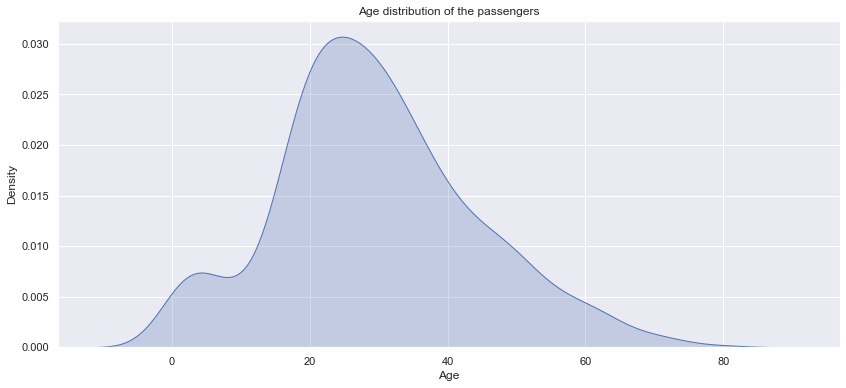

In [11]:
plt.figure(figsize=(14,6))
sns.set_theme()
sns.kdeplot(data=titanic_data['Age'], shade=True).set_title('Age distribution of the passengers')

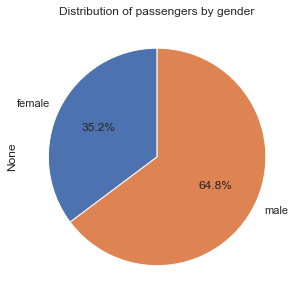

In [12]:
titanic_data.groupby('Sex').size().plot.pie(y='Sex',figsize=(5, 5),autopct='%1.1f%%', startangle=90) \
.set_title('Distribution of passengers by gender')
plt.show()

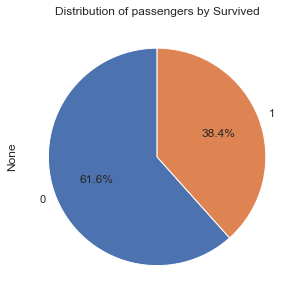

In [13]:
titanic_data.groupby('Survived').size().plot.pie(y='Survived',figsize=(5, 5),autopct='%1.1f%%', startangle=90) \
.set_title('Distribution of passengers by Survived')
plt.show()

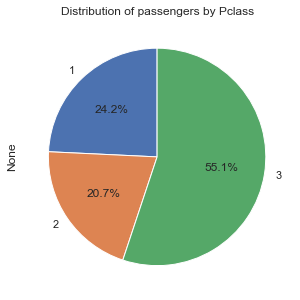

In [14]:
titanic_data.groupby('Pclass').size().plot.pie(y='Pclass',figsize=(5, 5),autopct='%1.1f%%', startangle=90) \
.set_title('Distribution of passengers by Pclass')
plt.show()

Text(0.5, 1.0, 'Distribution of count of siblings/spouses aboard the Titanic')

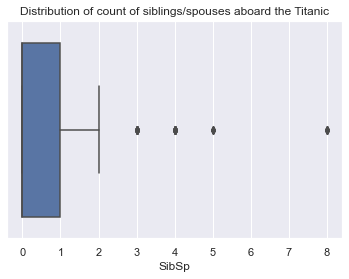

In [15]:
sns.boxplot(x=titanic_data['SibSp']).set_title('Distribution of count of siblings/spouses aboard the Titanic')

Text(0.5, 1.0, 'Distribution of count of parents/children aboard the Titanic')

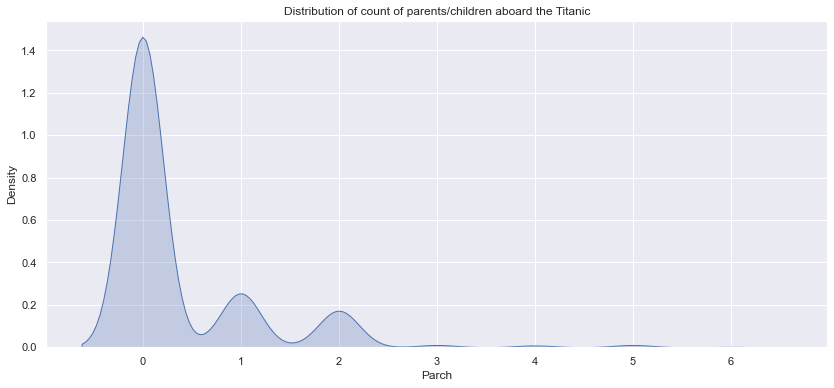

In [16]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=titanic_data['Parch'], shade=True).set_title('Distribution of count of parents/children aboard the Titanic')

Text(0.5, 1.0, 'Distribution of count of family memebers aboard the Titanic')

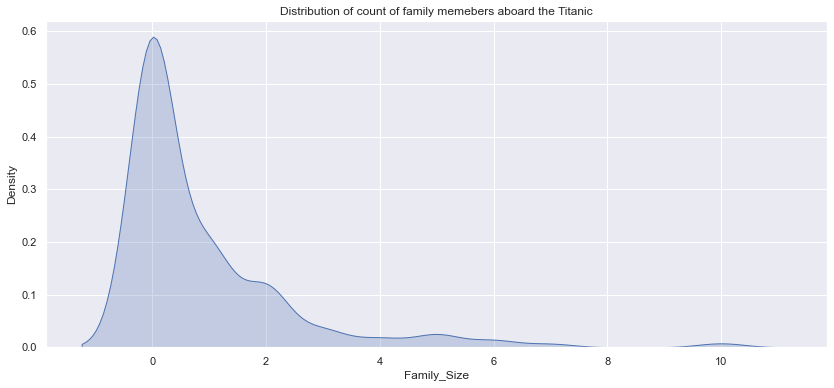

In [17]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=titanic_data['Family_Size'], shade=True).set_title('Distribution of count of family memebers aboard the Titanic')

Text(0.5, 1.0, 'Distribution of the ticket price for one passenger')

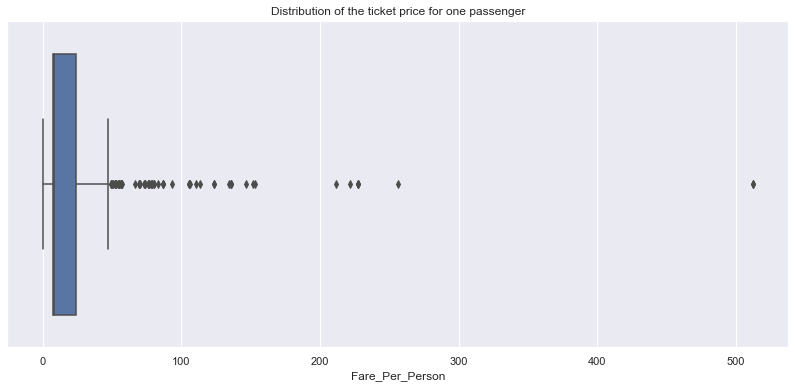

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x=titanic_data['Fare_Per_Person']).set_title('Distribution of the ticket price for one passenger')

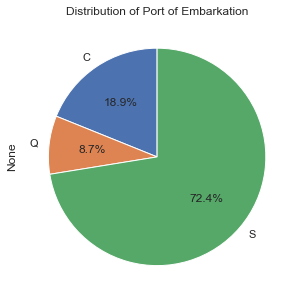

In [19]:
titanic_data.groupby('Embarked').size().plot.pie(y='Embarked',figsize=(5, 5),autopct='%1.1f%%', startangle=90).set_title('Distribution of Port of Embarkation')
plt.show()

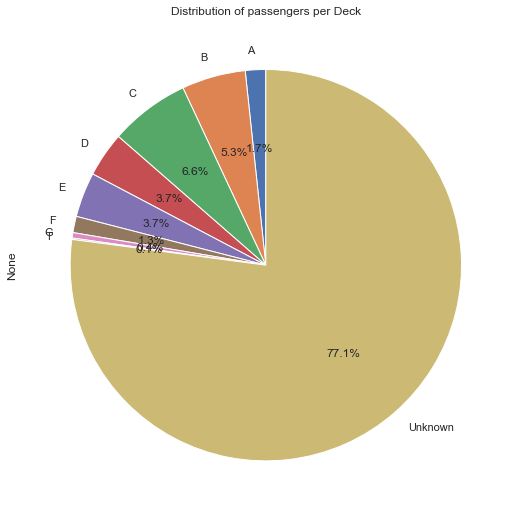

In [20]:
titanic_data.groupby('Deck').size().plot.pie(y='Deck',figsize=(9, 9),autopct='%1.1f%%', startangle=90).set_title('Distribution of passengers per Deck')
plt.show()

### Exploring the relationship between each variable

First of all, let's create a correlation matrix and find any correlated fields.

<AxesSubplot:>

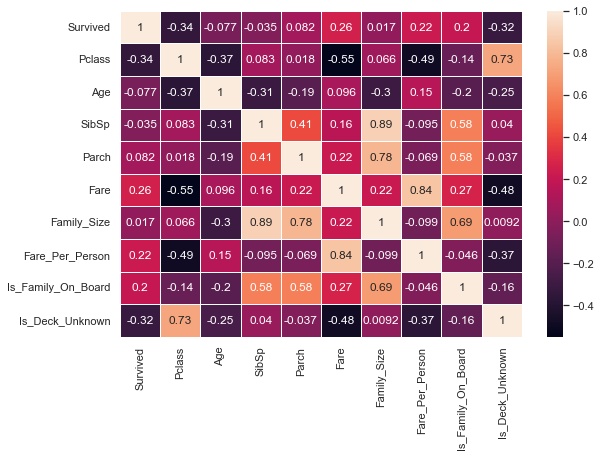

In [21]:
corrMatrix = titanic_data.corr('pearson')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=corrMatrix, annot=True, linewidths=.5, ax=ax)

In the charts below we can see some information, which is not related to Survived field directly but will help us to understand some common information about Titanic passengers.

Text(0.5, 1.0, 'The relationship between Age and Sex')

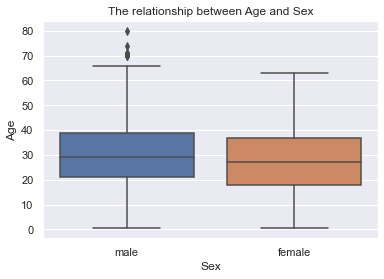

In [22]:
sns.boxplot(x='Sex', y='Age', data=titanic_data).set_title('The relationship between Age and Sex')

Text(0.5, 1.0, 'The relationship between Pclass and Sex')

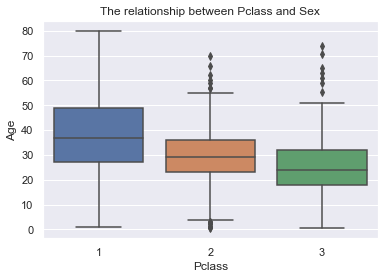

In [23]:
sns.boxplot(x='Pclass', y="Age", data=titanic_data).set_title('The relationship between Pclass and Sex')

This chart shows that the first-class passengers were older than the second and third ones.

Text(0.5, 1.0, 'The relationship between Pclass and Sex')

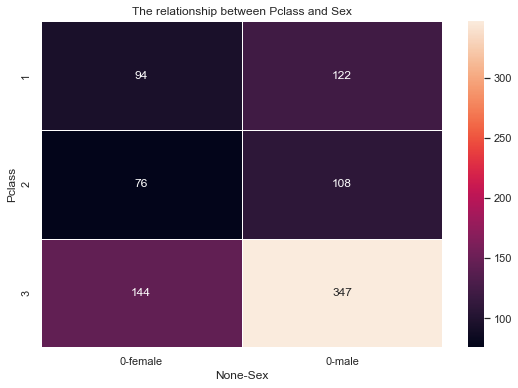

In [24]:
titanic_data_pclass = titanic_data.groupby(['Pclass', "Sex"]).size().reset_index().pivot('Pclass','Sex')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=titanic_data_pclass, annot=True,fmt="d", linewidths=.5, ax=ax).set_title('The relationship between Pclass and Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Fare_Per_Person'>

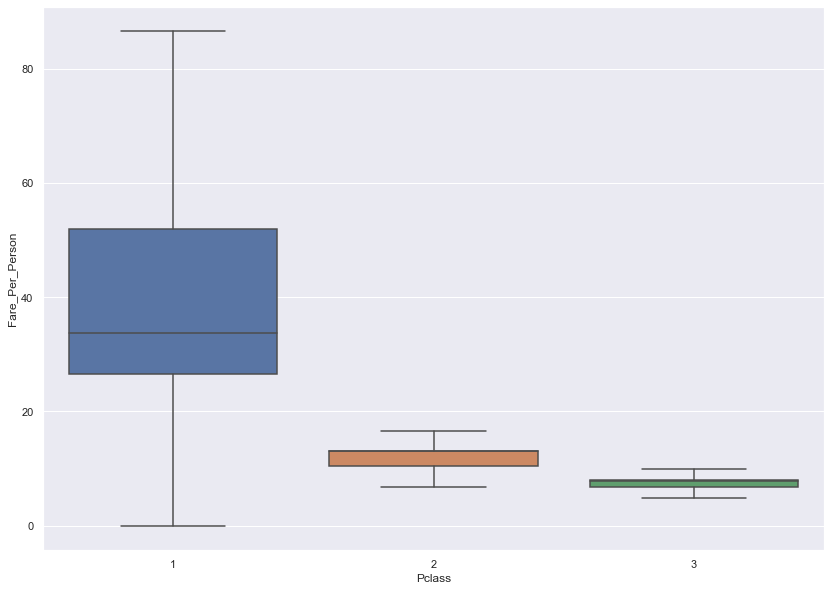

In [25]:
plt.figure(figsize=(14,10))
sns.boxplot(x = 'Pclass', y ='Fare_Per_Person', showfliers = False, data = titanic_data)

Obviously, 3rd class tickets were the cheapest ones.


Let's consider the relationship of a passenger's age to a Title.

Text(0.5, 1.0, 'The relationship between Age and Title')

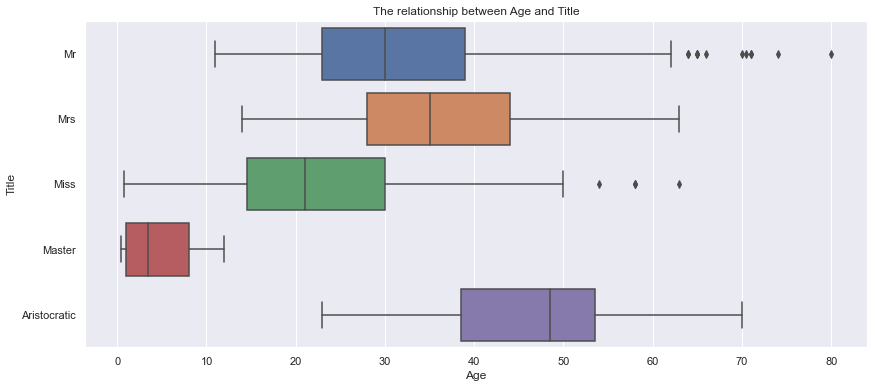

In [26]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Age', y="Title", data=titanic_data).set_title('The relationship between Age and Title')

As we can see from the chart above, Aristocratic were older than other passengers. Most people got married after 30, and the youngest married was at 13 y.o.!

Text(0.5, 1.0, 'The relationship between Age, Pclass and Sex')

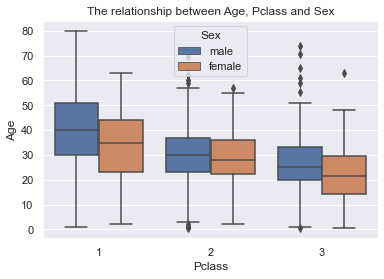

In [27]:
sns.boxplot(x = 'Pclass', y ='Age', hue='Sex', data = titanic_data).set_title('The relationship between Age, Pclass and Sex')

Text(0.5, 1.0, 'The relationship between Age and Family size')

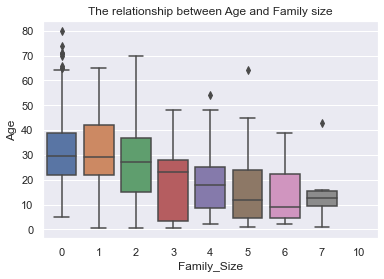

In [28]:
sns.boxplot(x='Family_Size', y='Age', data=titanic_data).set_title('The relationship between Age and Family size')

Text(0.5, 1.0, 'The relationship between Title and Pclass')

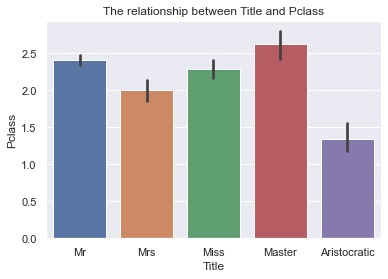

In [29]:
sns.barplot(x='Title', y='Pclass', data=titanic_data).set_title('The relationship between Title and Pclass')

### Related to Survived

Let's move on and find dependencies that are related to Survived field.

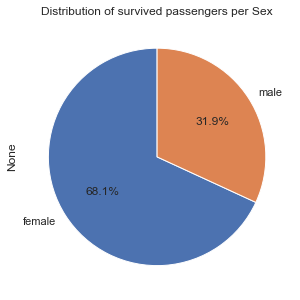

In [30]:
survived = titanic_data[titanic_data['Survived'] == 1].groupby('Sex').size()
survived.plot.pie(y='Sex',figsize=(5, 5),autopct='%1.1f%%', startangle=90) \
.set_title('Distribution of survived passengers per Sex')
plt.show()

We can see that womens survived 2 times more than mens.
That makes sense because women and children were rescued in the first place.

Text(0.5, 1.0, 'The relationship between Age and chance to survive')

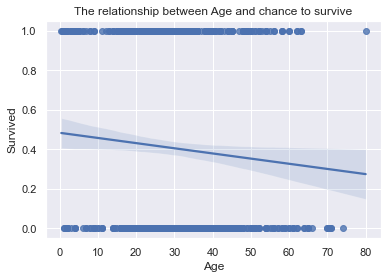

In [31]:
sns.regplot(x=titanic_data['Age'], y=titanic_data['Survived']).set_title('The relationship between Age and chance to survive')

From the graph above, you can see that the survival rate depended on the age of the passenger. Does this mean that children were saved as a priority?

Text(0.5, 1.0, 'The relationship between Age, Sex and chance to survive')

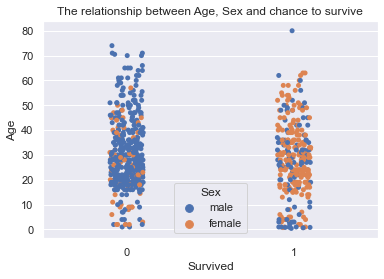

In [32]:
sns.stripplot(data=titanic_data, x="Survived", y="Age", hue = "Sex").set_title('The relationship between Age, Sex and chance to survive')

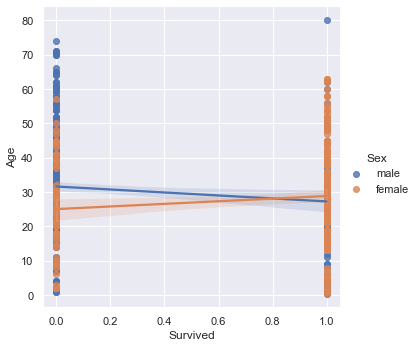

In [33]:
sns.lmplot(x="Survived", y="Age", hue="Sex", data=titanic_data)

[Text(0.5, 1.0, 'The relationship between Sex, Age status and chance to survive')]

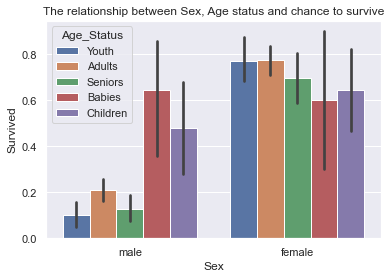

In [57]:
sns.barplot(x = 'Sex', y ='Survived', hue='Age_Status', data = titanic_data).set(title='The relationship between Sex, Age status and chance to survive')

We can see that the survival rate of women increased a bit with age, and vice versa for men.
However, a lot of men were survived even though they should have been the last to be rescued.

Let's look at Pclass field.

Text(0.5, 1.0, 'The relationship between Pclass, Sex and count of survived')

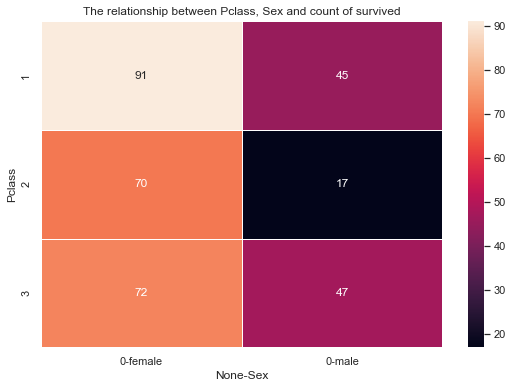

In [35]:
titanic_data_pclass_survived = titanic_data[titanic_data['Survived'] == 1] \
.groupby(['Pclass', "Sex"]).size().reset_index().pivot('Pclass','Sex')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=titanic_data_pclass_survived, annot=True,fmt="d", linewidths=.5, ax=ax).set_title('The relationship between Pclass, Sex and count of survived')

Text(0.5, 1.0, 'The relationship between Pclass and chance to survive')

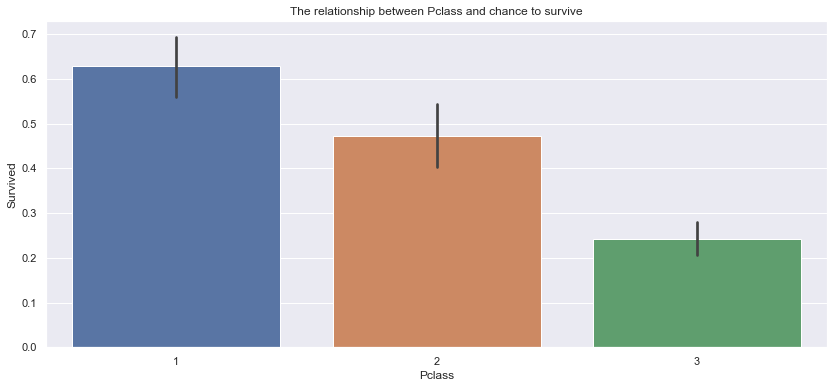

In [36]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Pclass', y ='Survived', data = titanic_data).set_title('The relationship between Pclass and chance to survive')

We see that the chance to survive is greater for people of the first class.

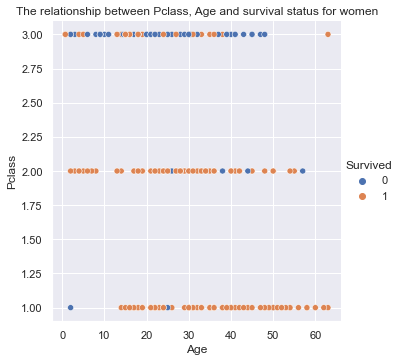

In [37]:
sns.relplot(x="Age", y="Pclass", hue="Survived", data=titanic_data_female).set(title='The relationship between Pclass, Age and survival status for women')

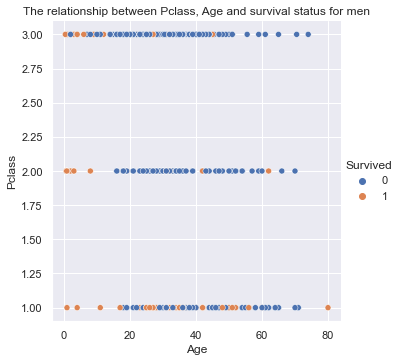

In [38]:
sns.relplot(x="Age", y="Pclass", hue="Survived", data=titanic_data_male).set(title='The relationship between Pclass, Age and survival status for men')

From the graphs above, we see that the chance of survival for women in first and second class is much higher.

Similarly for men, mostly children from all classes and men from the first class survived

[Text(0.5, 1.0, 'The relationship between Fare Per Person and chance to survive')]

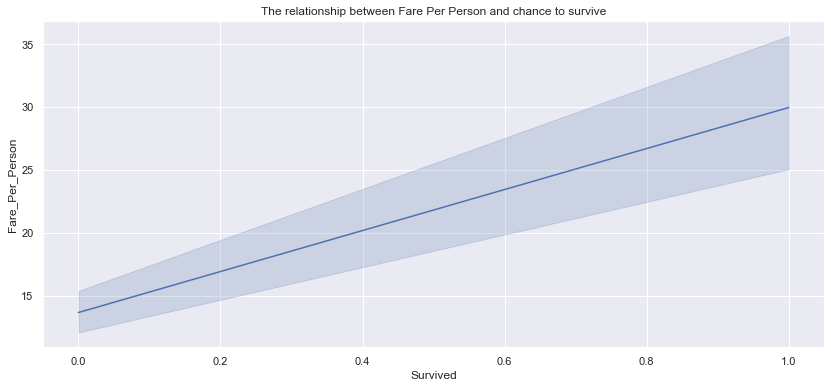

In [39]:
plt.figure(figsize=(14,6))
sns.lineplot(x= 'Survived', y='Fare_Per_Person', data=titanic_data).set(title='The relationship between Fare Per Person and chance to survive')

Thus, we can see that the higher the class and the ticket price, the higher the probability of survival.

Let's check how the cabin number and its availability depend on the probability of survival.

[Text(0.5, 1.0, 'The relationship between Is_Deck_Unknown and chance to survive')]

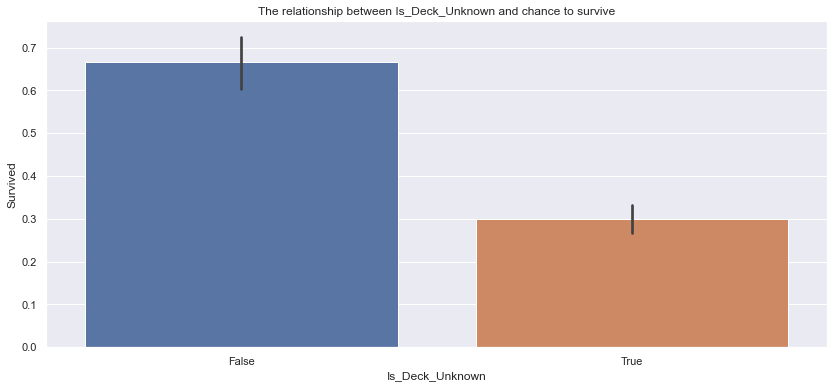

In [40]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Is_Deck_Unknown', y ='Survived', data = titanic_data).set(title='The relationship between Is_Deck_Unknown and chance to survive')

We see that people whose cabin numbers are known have a better chance of survival. This could be because the stateroom number was reported by surviving passengers after the crash.

[Text(0.5, 1.0, 'The relationship between Is_Deck_Unknown, Pclass and chance to survive for men')]

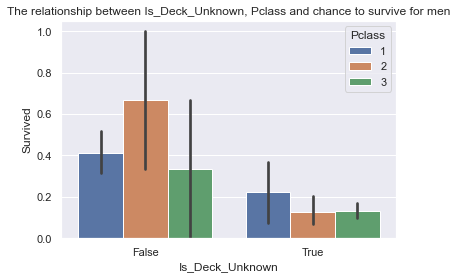

In [41]:
sns.barplot(x = 'Is_Deck_Unknown', y ='Survived', hue='Pclass', data = titanic_data_male).set(title='The relationship between Is_Deck_Unknown, Pclass and chance to survive for men')

[Text(0.5, 1.0, 'The relationship between Is_Deck_Unknown, Pclass and chance to survive for women')]

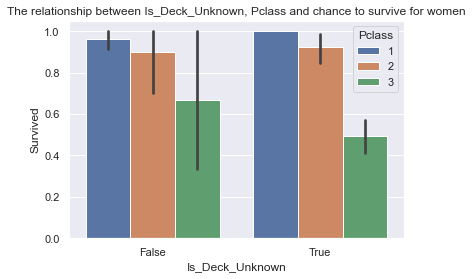

In [42]:
sns.barplot(x = 'Is_Deck_Unknown', y ='Survived', hue='Pclass', data = titanic_data_female).set(title='The relationship between Is_Deck_Unknown, Pclass and chance to survive for women')

Obviously, the assumption is true, especially for male passengers.

Let's take a look at how the Deck affected survivability.

[Text(0.5, 1.0, 'The relationship between Deck and chance to survive')]

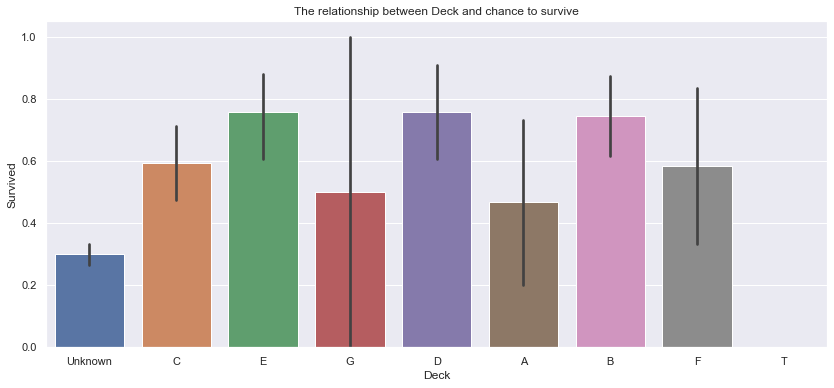

In [43]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Deck', y ='Survived', data = titanic_data).set(title='The relationship between Deck and chance to survive')

As we can see, the deck had a better chance of surviving were E,D,B and the least chance are those who did not have the number of the cabin.

Let's take a look at how Title affects the chance of survival.

[Text(0.5, 1.0, 'The relationship between Title and chance to survive')]

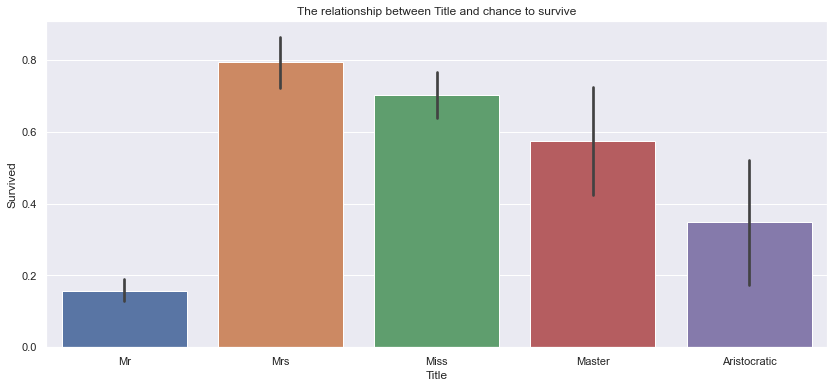

In [44]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Title', y ='Survived', data = titanic_data).set(title='The relationship between Title and chance to survive')

The charts above shows that the main groups of survivors are womens of all ages. And among the men, all the children survived except and a small proportion of men mostly from the first class.

Consider whether there is a connection between port of landing and survival.

[Text(0.5, 1.0, 'The relationship between port of landing and chance to survive')]

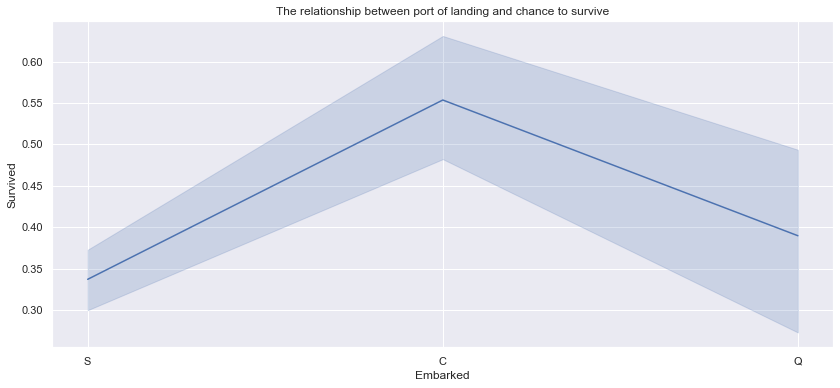

In [45]:
#C = Cherbourg, Q = Queenstown, S = Southampton
plt.figure(figsize=(14,6))
sns.lineplot(x='Embarked', y='Survived', data=titanic_data).set(title='The relationship between port of landing and chance to survive')

At first glance, you might notice that those who departed from the port of Cherbourg had the best chance of survival.

<Figure size 1008x432 with 0 Axes>

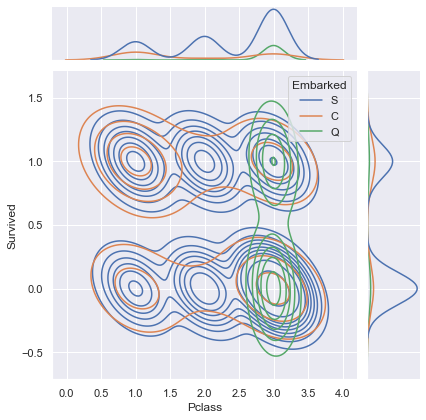

In [46]:
plt.figure(figsize=(14,6))

sns.jointplot(
    data=titanic_data,
    x="Pclass", y="Survived", hue="Embarked",
    kind="kde")

The graph above shows that the relationship between port of landing and survivability arose because of the port/class relationship.

Consider the relationship between the number of family members on board and the chance of survival.

[Text(0.5, 1.0, 'The relationship between family size and chance to survive')]

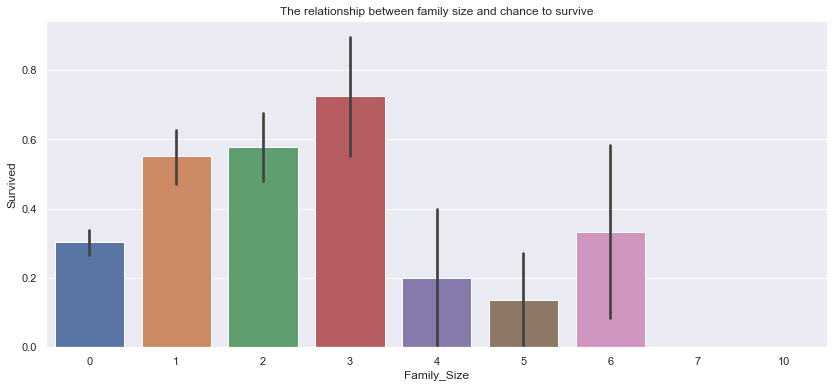

In [47]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Family_Size', y ='Survived', data = titanic_data).set(title='The relationship between family size and chance to survive')

It seems that the survival rate is negatively affected by both the absence of relatives and a large number of them.

[Text(0.5, 1.0, 'The relationship between family size and chance to survive for women')]

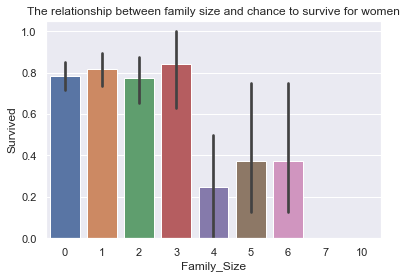

In [48]:
sns.barplot(x = 'Family_Size', y ='Survived', data = titanic_data_female).set(title='The relationship between family size and chance to survive for women')

[Text(0.5, 1.0, 'The relationship between family size and chance to survive for men')]

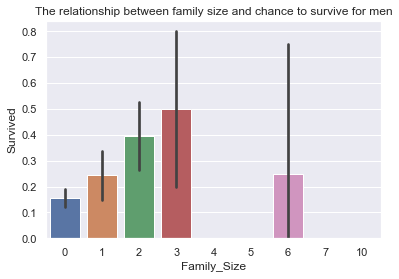

In [49]:
sns.barplot(x = 'Family_Size', y ='Survived', data = titanic_data_male).set(title='The relationship between family size and chance to survive for men')

The graph shows that for a woman, a small number of relatives significantly increases the probability of survival. It may mean that they were trying to save their many children in the first place.

[Text(0.5, 1.0, 'The relationship between any family memebrs on board and chance to survive')]

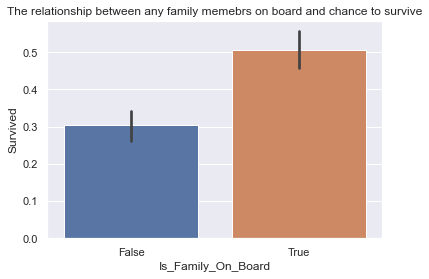

In [50]:
sns.barplot(x = 'Is_Family_On_Board', y ='Survived', data = titanic_data).set(title='The relationship between any family memebrs on board and chance to survive')

At first glance, it seems that the presence of relatives increases the chance of survival, but when you look at the relationship by class and gender, the picture changes.

[Text(0.5, 1.0, 'The relationship between any family memebrs on board, Pclass and chance to survive for men')]

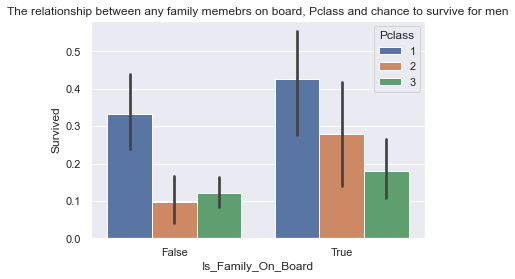

In [51]:
sns.barplot(x = 'Is_Family_On_Board', y ='Survived', hue='Pclass', data = titanic_data_male).set(title='The relationship between any family memebrs on board, Pclass and chance to survive for men')

[Text(0.5, 1.0, 'The relationship between any family memebrs on board, Pclass and chance to survive for women')]

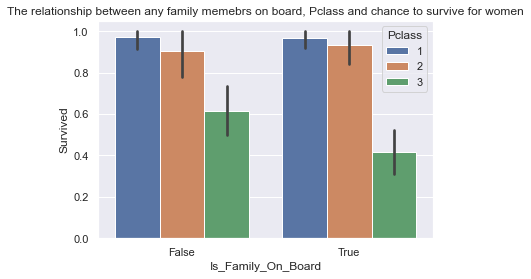

In [52]:
sns.barplot(x = 'Is_Family_On_Board', y ='Survived', hue='Pclass', data = titanic_data_female).set(title='The relationship between any family memebrs on board, Pclass and chance to survive for women')

For a man in the second class, relatives increase survival, but for a woman in the third class, the situation is the opposite. 

Let's check if number 7 was lucky for the Titanic's passengers.

[Text(0.5, 1.0, 'The relationship between count of 7 in the ticket and chance to survive')]

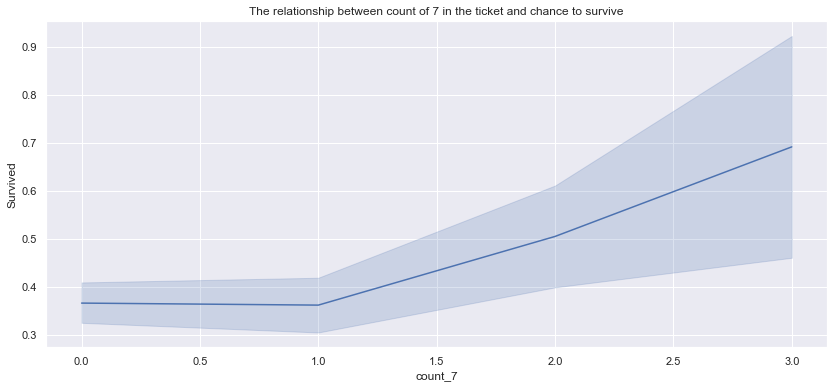

In [53]:
lucky_tickets = titanic_data;
lucky_tickets['count_7'] = pd.Index(lucky_tickets['Ticket']).str.count('7')
plt.figure(figsize=(14,6))
sns.lineplot(x= 'count_7', y='Survived', data=lucky_tickets).set(title='The relationship between count of 7 in the ticket and chance to survive')

As you can see from the graph above, repeating the number 7 in the ticket 2 and 3 times increased the chances of survival.

# Summary

Thus we obtain that the survival rate was influenced by such factors as:
 - Sex
 - Pclass and Fare
 - Age
 - Count of family memebers on board

Let's take a look, how was you chance to survive:
 - man under 18 =  33.8%
 - man above 18 =  17.7%
 - woman under 18 = 67.6%
 - woman above 18 = 77.2%

[Text(0.5, 1.0, 'The relationship between Pclass, Age_Status and chance to survive for men')]

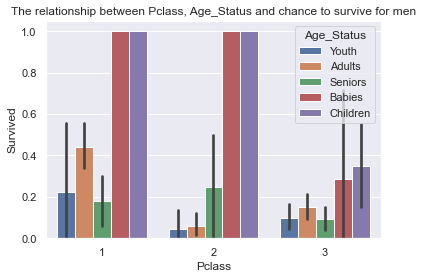

In [54]:
sns.barplot(x = 'Pclass', y ='Survived', hue='Age_Status', data = titanic_data_male).set(title='The relationship between Pclass, Age_Status and chance to survive for men')

[Text(0.5, 1.0, 'The relationship between Pclass, Age_Status and chance to survive for women')]

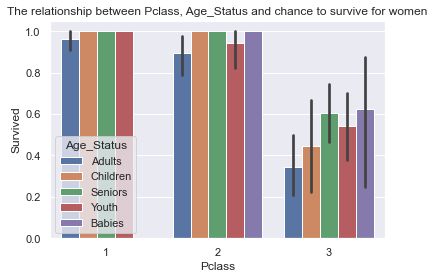

In [55]:
sns.barplot(x = 'Pclass', y ='Survived', hue='Age_Status', data = titanic_data_female).set(title='The relationship between Pclass, Age_Status and chance to survive for women')

The maximum chance of survival was for the women of the first class and the minimum for seniors men from third class.